Let's start by working on a simpler problem where we have 5 days remaining, 20 tickets to sell, and `demand_level` is uniformly distributed between 10 and 20.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import numpy as np
from collections import Counter

def get_todays_sell_price(todays_demand, days_remaining, tickets_remaining, n_sims=10**4):
    if days_remaining == 1:
        return max(todays_demand - tickets_remaining, 1)
    
    demands = np.random.randint(100, 201, size=(n_sims, days_remaining))
    demands[:, 0] = todays_demand
    # 
    ceilings = np.max(demands, axis=1)
    price_floors = np.zeros(n_sims)
    for i, (demand, ceiling) in enumerate(zip(demands, ceilings)):
        floor = ceiling
        tickets_sold = 0
        while tickets_sold < tickets_remaining:
            floor -= 1
            diffs = demand - floor
            tickets_sold = np.sum(np.where(diffs >= 0, diffs, 0))
        price_floors[i] = floor
    
    return max(int(Counter(price_floors).most_common()[0][0]), 1)

In [4]:
simulation_profits = np.zeros(1000)
for j in range(1000):
    days_remaining = 30
    demand_levels = np.random.randint(100, 201, size=days_remaining)
    tickets_remaining = 100
    sales = np.zeros(days_remaining)
    profits = np.zeros(days_remaining)

    for i, demand_level in enumerate(demand_levels):
        sell_price = get_todays_sell_price(demand_level, days_remaining, tickets_remaining, n_sims=10**3)
        tickets_sold = max(demand_level - sell_price, 0)

        if tickets_sold > tickets_remaining:
            tickets_sold = tickets_remaining
            sell_price = demand_level - tickets_sold

        sales[i] = tickets_sold
        profits[i] = tickets_sold * sell_price
        tickets_remaining -= tickets_sold    
        days_remaining -= 1
        
    simulation_profits[j] = np.sum(profits)

In [5]:
simulation_profits

array([16572., 17824., 16615., 16926., 17644., 15962., 16640., 18035.,
       17416., 17578., 16556., 17811., 17610., 15230., 17225., 16987.,
       17812., 16724., 17300., 17874., 17157., 16932., 16527., 16017.,
       16643., 17143., 16474., 17591., 14852., 17143., 17373., 16763.,
       17733., 17639., 16670., 16280., 16790., 11832., 17192., 16230.,
       17330., 16696., 16255., 16733., 16830., 17039., 17473., 17622.,
       17881., 16850., 13997., 17032., 18021., 15018., 17023., 16748.,
       17811., 17263., 16835., 17561., 17056., 17253., 17695., 16153.,
       17023., 18036., 17235., 17319., 17635., 17698., 17223., 17186.,
       16574., 17095., 18083., 16059., 16926., 17747., 16893., 17260.,
       17417., 15722., 17906., 17902., 16988., 15781., 16959., 17067.,
       17520., 17438., 16116., 17587., 15140., 17800., 17465., 16441.,
       18020., 17283., 17179., 16849., 16712., 17198., 17740., 17891.,
       17609., 14346., 16370., 15071., 16869., 17316., 17778., 15795.,
      

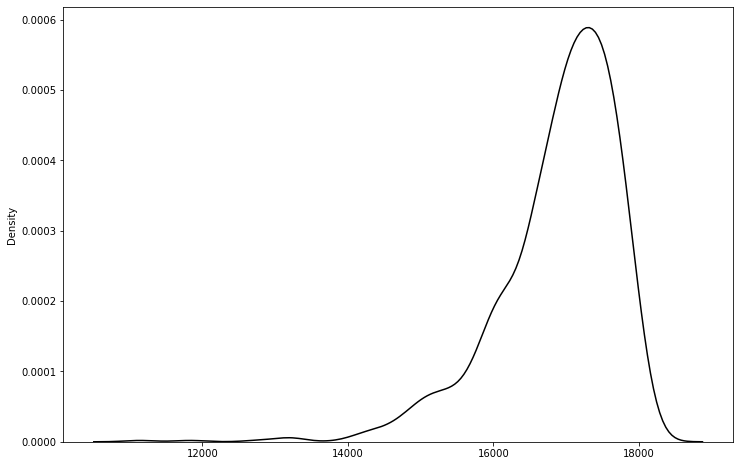

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.kdeplot(simulation_profits, color='black');

In [26]:
np.mean(simulation_profits), np.median(simulation_profits)

(16887.936, 17065.0)